# Lyrical Analysis

## Word Cloud and Sentiment

This notebook contains a Python script that analyzes song lyrics. The analysis is performed in two parts:

1. **Word Cloud Visualization**: The script takes a string of song lyrics and generates a word cloud. This visualization helps understand the frequency of words in the song lyrics. The most frequently occurring words appear larger in the word cloud. In this script, we use the `CountVectorizer` from sklearn to convert text data into a matrix of word counts. We then use the `WordCloud` function from the wordcloud library to generate the visualization.

2. **Sentiment Analysis**: The script also performs sentiment analysis on the song lyrics using the `SentimentIntensityAnalyzer` from the nltk library. Sentiment analysis is the process of determining the emotional tone behind a series of words. It is used to gain an understanding of the attitudes, opinions and emotions expressed within the text.

To use the script, call the function `analyze_lyrics()` with your song lyrics as an argument. The function will display the word cloud and print the sentiment scores.

```python
analyze_lyrics("your song lyrics here")


In [19]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from PIL import Image

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jakehclark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Function to use NLTK to:
    - Tokenize
    - Count word frequencies
      - Create frequency dictionary 
    - Generate word cloud
    - Use SentimentIntensityAnalyzer to get sentiment scores
      - Score Categories:
        - `neg` Negative: A measure of how negative the text is (0 = not negative, 1 = very negative)
        - `neu` Neutral: A measure of how neutral the text is (0 = very neutral, 1 = not neutral)
        - `pos` Positive: A measure of how positive the text is (0 = not positive, 1 = very positive)
        - `compound` Compound: A measure of the overall sentiment of the text (0 = very negative, 1 = very positive)

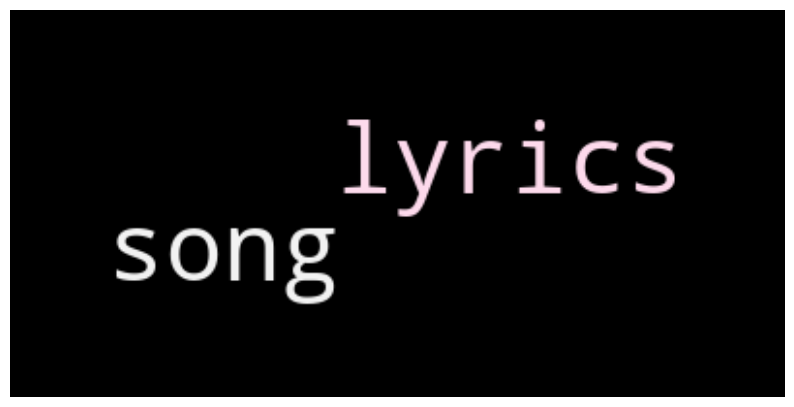

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [28]:
def analyze_lyrics(lyrics):
    """
    This function takes a string of song lyrics, creates a word cloud visualization, 
    and performs sentiment analysis.
    
    Parameters:
    lyrics (str): The song lyrics to analyze.
    """
    
    # Instantiate a CountVectorizer object to transform the text data into a bag-of-words
    vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the data
    word_count = vectorizer.fit_transform([lyrics])

    # Sum up the counts of each vocabulary word
    word_freq = word_count.sum(axis=0).tolist()[0]

    # Get feature names (words) from vectorizer
    words = vectorizer.get_feature_names_out()

    # Prepare a dictionary with words and their corresponding frequencies
    word_freq_dict = dict(zip(words, word_freq))

    # Generate a word cloud image
    wordcloud = WordCloud(background_color='black', colormap='Pastel1', max_font_size=50, max_words=100).generate_from_frequencies(word_freq_dict)

    # Display the generated image
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    # Perform sentiment analysis on the text data
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(lyrics)

    # Print the sentiment scores
    print(sentiment)

# Test
# analyze_lyrics("your song lyrics here")

## Word Cloud and Sentiment (Discography)

Total length of `lyric_string`: 225219


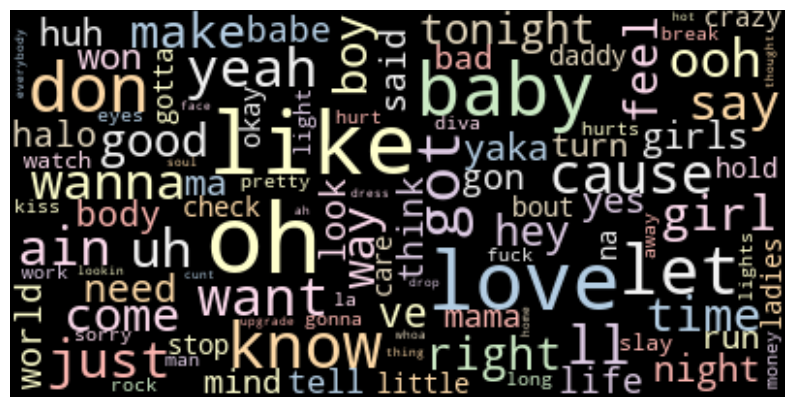

{'neg': 0.102, 'neu': 0.702, 'pos': 0.196, 'compound': 1.0}


In [55]:

import pandas as pd

df = pd.read_csv("./data/combined_lyrics.csv")
album_lyrics = df["lyric"].values

# Join all the strings in the array into a single string
lyrics_string = ' '.join(album_lyrics)

print(f"Total length of `lyric_string`: {len(lyrics_string)}")
# print(album_lyrics)

analyze_lyrics(lyrics_string)

### (Beyonce) Album Lyrics (`album_lyrics.csv`)

Definition of each column in the dataset:

- **artist**: Name of the artist
- **album**: Name of the album
- **track_title**: Title of the song
- **track_num**: Track number within the album
- **lyric**: Lyrics of the song
- **line**: Number of lines in each song
- **year**: Release year of the album

Source: [Kaggle](https://www.kaggle.com/datasets/hillaryosei/beyonce-lyrics)


## Word Cloud and Sentiment (Per album)